<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-03-18 22:07:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  76.0MB/s    in 2.0s    

2025-03-18 22:07:21 (76.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



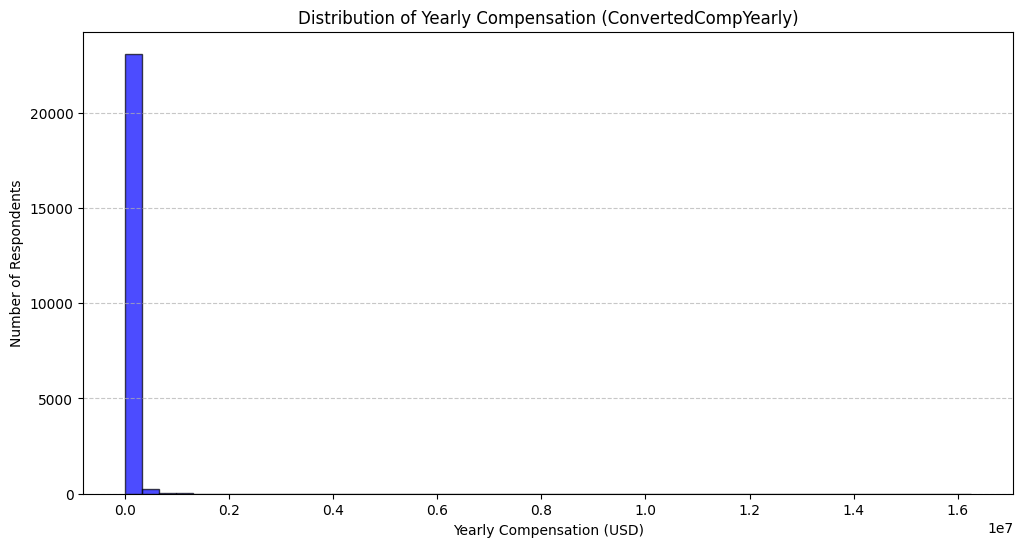

In [4]:
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

df = df.dropna(subset=['ConvertedCompYearly'])

plt.figure(figsize=(12, 6))
plt.hist(df['ConvertedCompYearly'], bins=50, color='blue', edgecolor='black', alpha=0.7)

plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [ ]:
## Write your code here

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



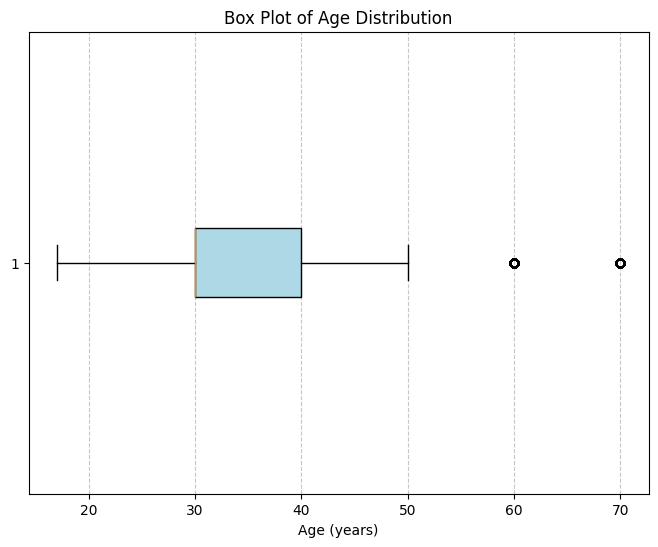

In [5]:
## Write your code here
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    "Prefer not to say": None 
}
df["AgeNumeric"] = df["Age"].map(age_mapping)

df_cleaned = df.dropna(subset=["AgeNumeric"])

plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned["AgeNumeric"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title("Box Plot of Age Distribution")
plt.xlabel("Age (years)")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


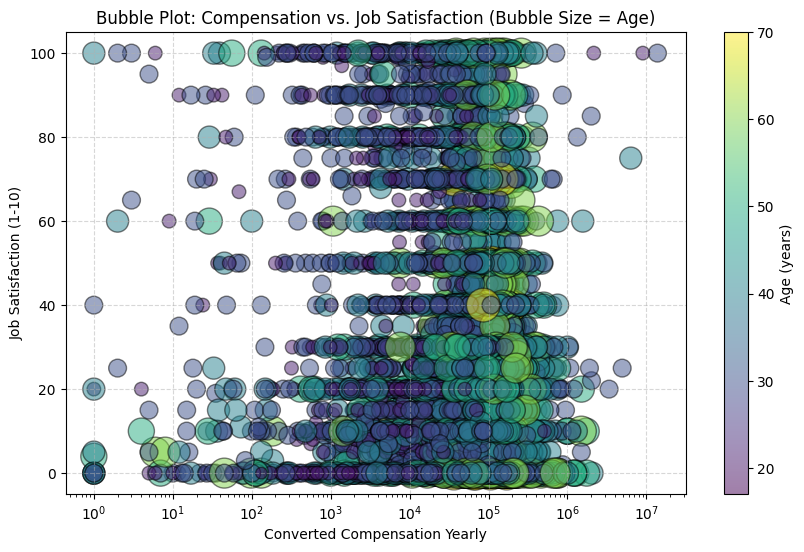

In [6]:
import numpy as np

age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    "Prefer not to say": None 
}
df["AgeNumeric"] = df["Age"].map(age_mapping)

df_cleaned = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "AgeNumeric"])

bubble_size = df_cleaned["AgeNumeric"] ** 1.5 

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned["ConvertedCompYearly"], df_cleaned["JobSatPoints_6"], 
            s=bubble_size, alpha=0.5, c=df_cleaned["AgeNumeric"], cmap="viridis", edgecolors="k")

plt.title("Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Converted Compensation Yearly")
plt.ylabel("Job Satisfaction (1-10)")
plt.colorbar(label="Age (years)") 
plt.grid(True, linestyle="--", alpha=0.5)
plt.xscale("log")

plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



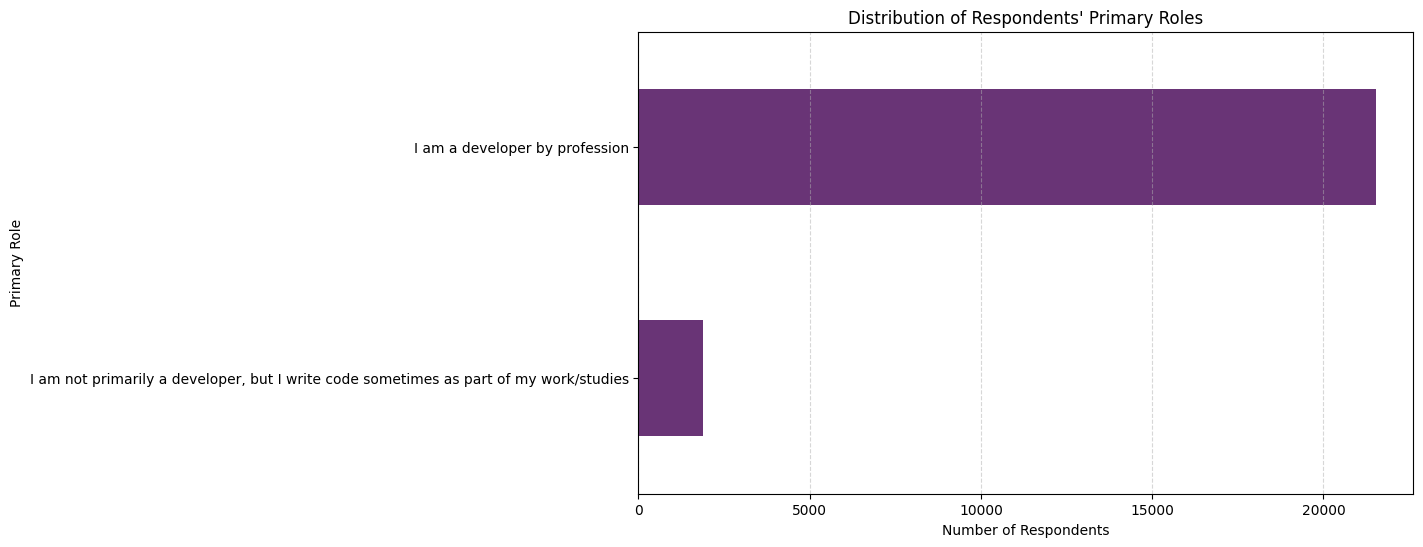

In [7]:
df_cleaned = df.dropna(subset=["MainBranch"])

branch_counts = df_cleaned["MainBranch"].value_counts()

plt.figure(figsize=(10, 6))
branch_counts.sort_values().plot(kind="barh", colormap="viridis", alpha=0.8)

plt.title("Distribution of Respondents' Primary Roles")
plt.xlabel("Number of Respondents")
plt.ylabel("Primary Role")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



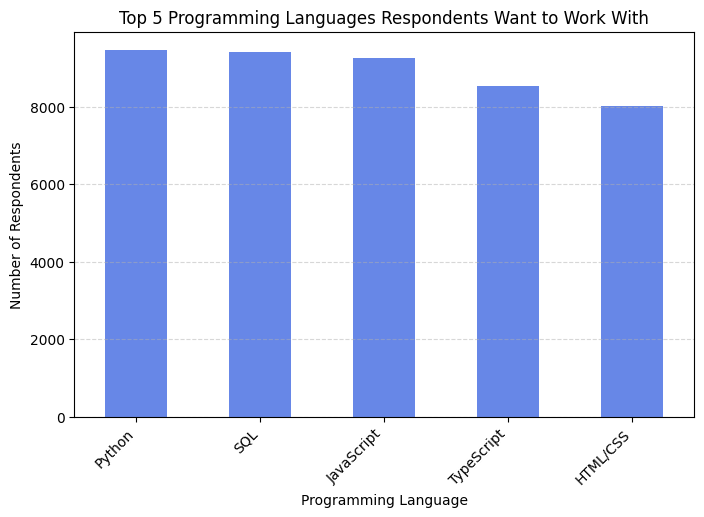

In [8]:
df_cleaned = df.dropna(subset=["LanguageWantToWorkWith"])

df_exploded = df_cleaned["LanguageWantToWorkWith"].str.split(";").explode()

lang_counts = df_exploded.value_counts()

top_5_langs = lang_counts.head(5)

plt.figure(figsize=(8, 5))
top_5_langs.plot(kind="bar", color="royalblue", alpha=0.8)

plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


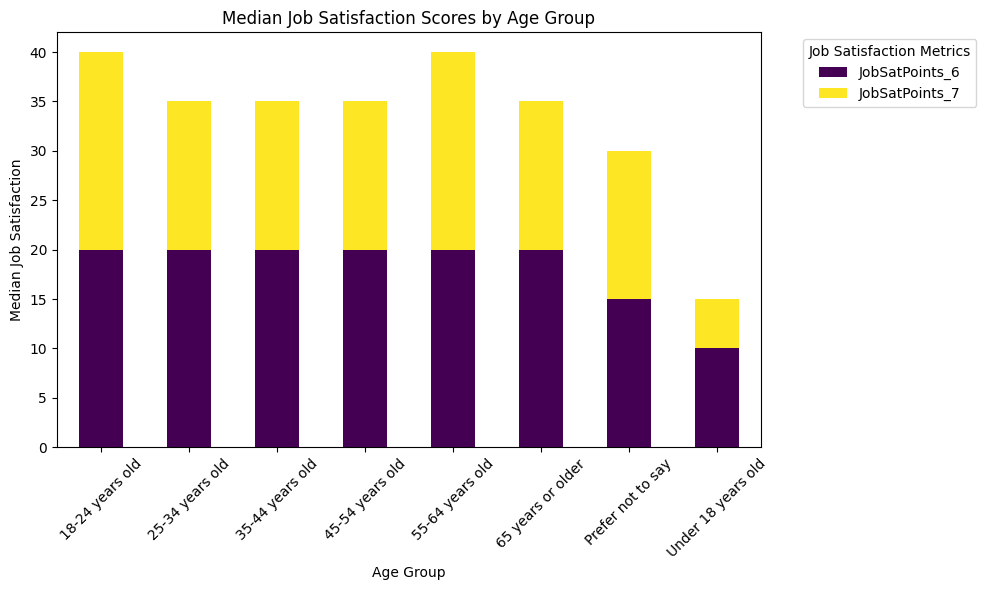

In [10]:
df_cleaned = df.dropna(subset=["JobSatPoints_6", "JobSatPoints_7", "Age"])

age_sat_medians = df_cleaned.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

ax = age_sat_medians.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.title("Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction")
plt.xticks(rotation=45)
plt.legend(title="Job Satisfaction Metrics", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()

plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_1739/32316800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["DatabaseHaveWorkedWith"] = df_cleaned["DatabaseHaveWorkedWith"].str.split(";")


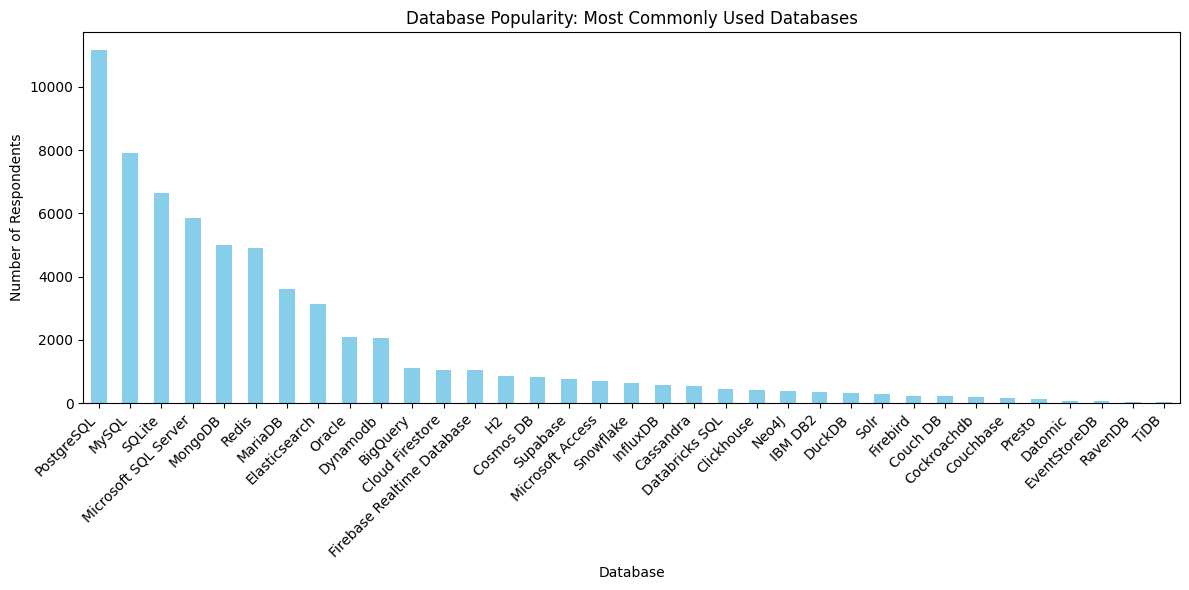

In [12]:
df_cleaned = df.dropna(subset=["DatabaseHaveWorkedWith"])

df_cleaned["DatabaseHaveWorkedWith"] = df_cleaned["DatabaseHaveWorkedWith"].str.split(";")

databases_exploded = df_cleaned.explode("DatabaseHaveWorkedWith")

database_counts = databases_exploded["DatabaseHaveWorkedWith"].value_counts()

ax = database_counts.plot(kind="bar", figsize=(12, 6), color="skyblue")

plt.title("Database Popularity: Most Commonly Used Databases")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha="right") 
plt.tight_layout()

plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_1739/1234508289.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeGroup'] = pd.cut(df['Age'].replace({
/tmp/ipykernel_1739/1234508289.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_comp = df_cleaned.groupby('AgeGroup')['ConvertedCompYearly'].median()


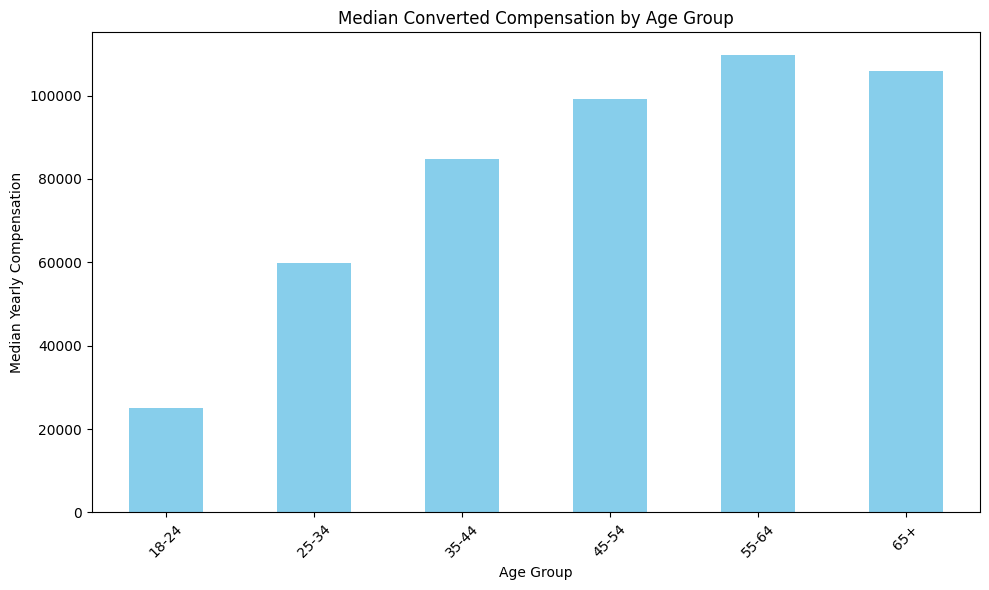

In [13]:
bins = [18, 24, 34, 44, 54, 64, 100]  # Define age ranges
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['AgeGroup'] = pd.cut(df['Age'].replace({
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None}), bins=bins, labels=labels, right=False)

df_cleaned = df.dropna(subset=['AgeGroup', 'ConvertedCompYearly'])

age_group_comp = df_cleaned.groupby('AgeGroup')['ConvertedCompYearly'].median()

ax = age_group_comp.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Median Converted Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



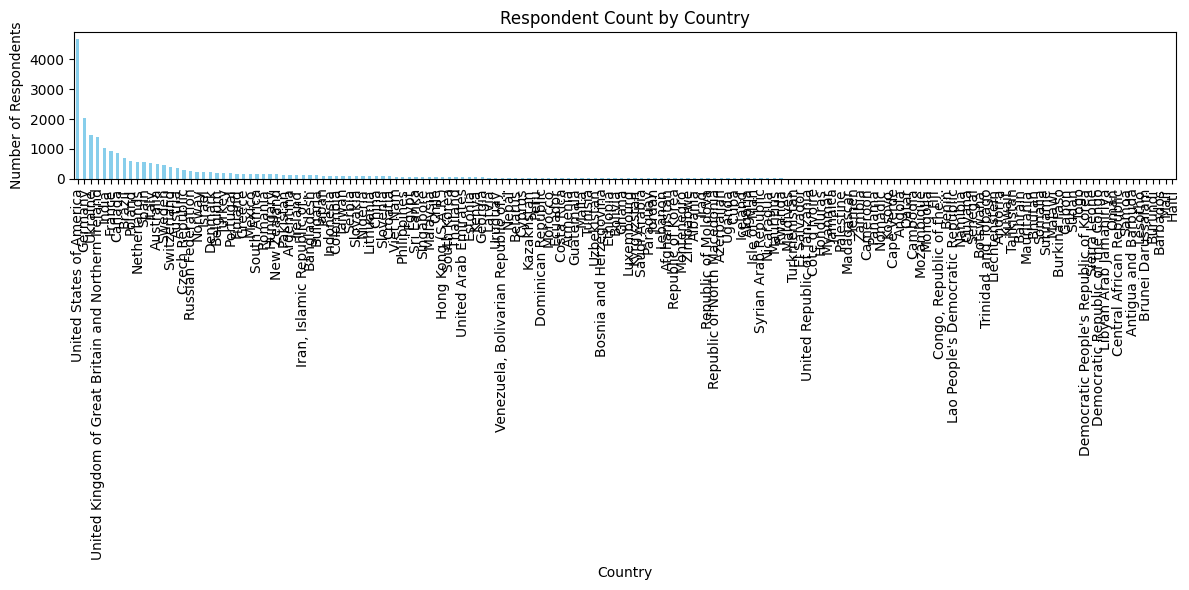

In [14]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Country' and count the number of respondents in each country
country_counts = df['Country'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='skyblue')

# Customize the plot
plt.title('Respondent Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
